# Assignment 8 & 9

This assignement will be covered with two tutorium, you don't have to give back any work before holidays. The next part will be uploaded during the holidays and after the next tutorium after holidays, you will have to give back your work. 

## Ex. 8.0
We start by installing pytorch, a popular machine learning framework. Go to [pytorch.org](https://pytorch.org/), choose your target system and install pytorch (via conda).

You can try pytorch on [Google Colab](https://colab.research.google.com), too. Colab integrates with your Google account, your notebooks will be stored on Google Drive and you can read datasets from there too. You can even use GPUs and TPUs! However, we still suggest you install pytorch on your local computer because variables might get lost when your computer disconnects from the internet or the notebook runs idle for a while.  

Browse through the [pytorch tutorials ](https://pytorch.org/tutorials/), they often come as colab notebooks - go and execute some!

In [143]:
import torch
import torchvision
import torchvision.transforms as transforms

## Ex. 8.1
Make your own convolutionnal network of the following structure : **3 layer of convolution and 2 layer of neurones**. We would like to see in it **some padding, stride, pooling, drop out and batch normalization**. Use the **ReLU** activation fonction. You should define your network, make a train fonction, a test fonction to display the result and make them work!

Setup some hyper-parameter for your network

In [144]:
n_epochs = 3
batch_size_train = 10
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

Now, load MNIST from torch and 

In [145]:
trainloader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_train, shuffle=True)

testloader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_test, shuffle=True)

In [146]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

Display some instance of the training set

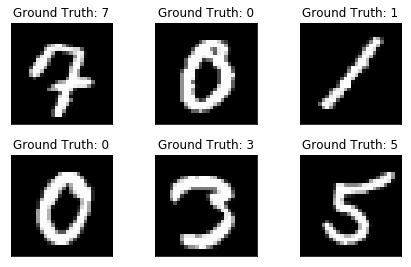

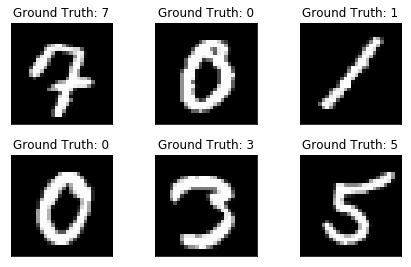

In [147]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [148]:
#Good luck!

In [149]:
# DESIGN NETWORK
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(10)
        
        self.conv2 = nn.Conv2d(10, 20, 5, stride=1)
        self.bn2 = nn.BatchNorm2d(20)
        
        self.conv3 = nn.Conv2d(20, 40, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(40)
        
        self.fc1 = nn.Linear(40 * 8 * 8, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.dropout = nn.Dropout(p=0.5)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.bn1(x)
        x = self.dropout(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = self.dropout(F.relu(self.conv3(x)))
        x = self.bn3(x)
        x = x.view(-1, 40 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [150]:
# LOSS FCT & OPTIMIZER
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [151]:
# TRAIN
for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(inputs.shape)
        #print(labels.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        

print('Finished Training')

[1,  2000] loss: 0.558
[1,  4000] loss: 0.159
[1,  6000] loss: 0.127
[2,  2000] loss: 0.099
[2,  4000] loss: 0.088
[2,  6000] loss: 0.084
[3,  2000] loss: 0.079
[3,  4000] loss: 0.073
[3,  6000] loss: 0.068
Finished Training


In [152]:
# TEST
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
